 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.05224494264597794
       x: [ 3.464e-01  5.735e-01  1.940e+00  9.988e-01]
     nit: 86
     jac: [-4.813e-03  3.661e-03  1.329e-03 -4.476e-02]
    nfev: 466
    njev: 86


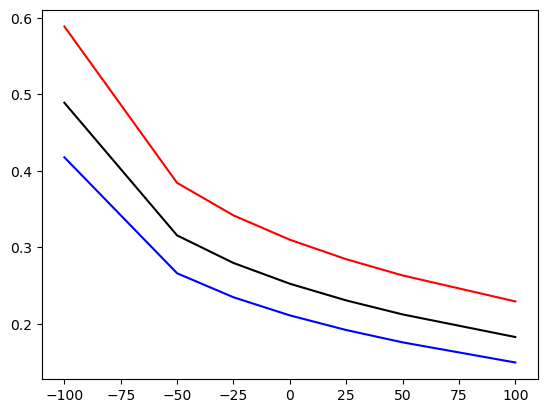

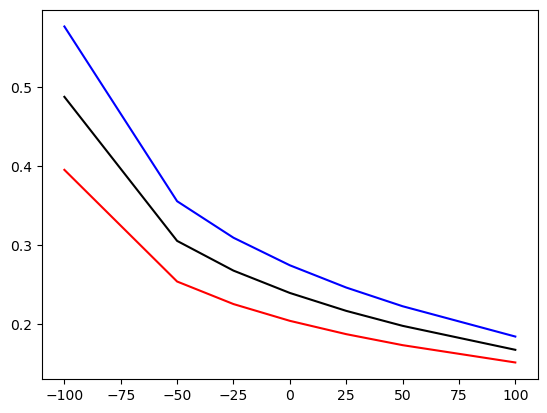

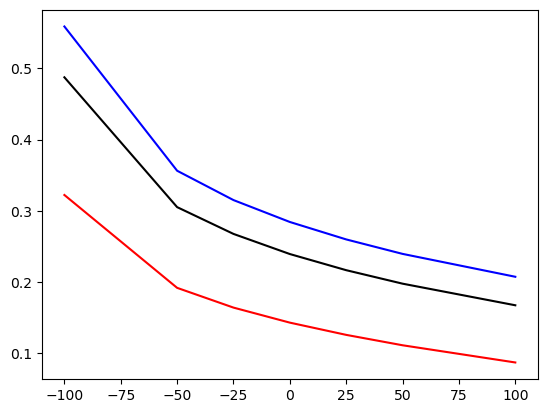

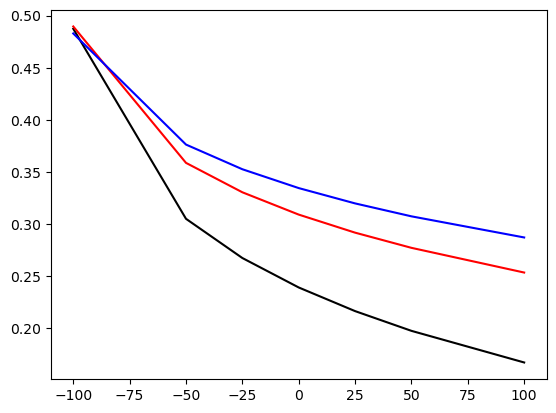

In [1]:
import numpy as np
import pandas as pd
import QuantLib as ql
from matplotlib import pyplot as plt
from scipy import optimize

# Parameters from the post
strikes = [-100, -50, -25, 0, 25, 50, 100]
vols = [1.047, 0.4812, 0.4327, 0.4268, 0.4148, 0.4253, 0.4322]

fwd = 0.035
expiry = 0.25
shift = 0.0110 # Shift chosen to make first strike positive

# params are sigma_0, beta, vol_vol, rho
params = [0.2, 0.6, 0.3, -0.4]

# Optimise SABR least squares using python's minimize function
def f(params):
    alpha, beta, nu, rho = params[0], params[1], params[2], params[3]

    alpha = max(alpha, 1e-8) # Avoid alpha going negative
    beta = max(beta, 1e-8) # Avoid beta going negative
    nu = max(nu, 1e-8) # Avoid nu going negative
    rho = max(rho, -0.999) # Avoid rhp going < -1.0
    rho = min(rho, 0.999) # Avoid rho going > 1.0

    calc_vols = np.array([
        ql.sabrVolatility(strike*1e-4 + shift, fwd + shift, expiry, alpha, beta, nu, rho)
        for strike in strikes
    ])

    error = ((calc_vols - np.array(vols))**2 ).mean() **.5
    return error

cons = (
    {'type': 'ineq', 'fun': lambda x: x[0]},
    {'type': 'ineq', 'fun': lambda x: 0.99 - x[1]},
    {'type': 'ineq', 'fun': lambda x: x[1]},
    {'type': 'ineq', 'fun': lambda x: x[2]},
    {'type': 'ineq', 'fun': lambda x: 1. - x[3]**2}
)

result = optimize.minimize(f, params, constraints=cons, options={'eps': 1e-5})
alpha, beta, nu, rho = result['x'][0], result['x'][1], result['x'][2], result['x'][3]

calc_vols = np.array([
    ql.sabrVolatility(strike*1e-4 + shift, fwd + shift, expiry, alpha, beta, nu, rho)
    for strike in strikes
])

results = pd.DataFrame([vols, calc_vols], columns=strikes, index=['market', 'SABR'])
print(result)

# Beta shift
fwd = 0.035
alpha = 0.03
beta = 0.6
beta_ = 0.5
beta_1 = 0.7
nu= 0.3
rho =-0.3
expiry = 1
calc_vols = np.array([
    ql.sabrVolatility(strike*1e-4 + shift, fwd + shift, expiry, alpha, beta, nu, rho)
    for strike in strikes
])
calc_vols_ = np.array([
    ql.sabrVolatility(strike*1e-4 + shift, fwd + shift, expiry, alpha, beta_, nu, rho)
    for strike in strikes
])
calc_vols_1 = np.array([
    ql.sabrVolatility(strike*1e-4 + shift, fwd + shift, expiry, alpha, beta_1, nu, rho)
    for strike in strikes
])
plt.plot(strikes,calc_vols, c = 'black')
plt.plot(strikes,calc_vols_ ,c= 'r')
plt.plot(strikes,calc_vols_1, c='b')
plt.show()
calc_vols_1
# nu shift
fwd = 0.025
alpha = 0.03
beta = 0.6
nu= 0.3
nu_ = 0.2
nu_1 = 0.4
rho =-0.3
expiry = 1
calc_vols = np.array([
    ql.sabrVolatility(strike*1e-4 + shift, fwd + shift, expiry, alpha, beta, nu, rho)
    for strike in strikes
])
calc_vols_ = np.array([
    ql.sabrVolatility(strike*1e-4 + shift, fwd + shift, expiry, alpha, beta, nu_, rho)
    for strike in strikes
])
calc_vols_1 = np.array([
    ql.sabrVolatility(strike*1e-4 + shift, fwd + shift, expiry, alpha, beta, nu_1, rho)
    for strike in strikes
])
plt.plot(strikes,calc_vols, c = 'black')
plt.plot(strikes,calc_vols_ ,c= 'r')
plt.plot(strikes,calc_vols_1, c='b')
plt.show()
# alpha shift
fwd = 0.025
alpha = 0.03
alpha_ = 0.01
alpha_1 = 0.04
beta = 0.6
nu= 0.3

rho =-0.3
expiry = 1
calc_vols = np.array([
    ql.sabrVolatility(strike*1e-4 + shift, fwd + shift, expiry, alpha, beta, nu, rho)
    for strike in strikes
])
calc_vols_ = np.array([
    ql.sabrVolatility(strike*1e-4 + shift, fwd + shift, expiry, alpha_, beta, nu, rho)
    for strike in strikes
])
calc_vols_1 = np.array([
    ql.sabrVolatility(strike*1e-4 + shift, fwd + shift, expiry, alpha_1, beta, nu, rho)
    for strike in strikes
])
plt.plot(strikes,calc_vols, c = 'black')
plt.plot(strikes,calc_vols_ ,c= 'r')
plt.plot(strikes,calc_vols_1, c='b')
plt.show()
# forward rate shift
fwd = 0.025
fwd_ = 0.15
fwd_1 = 0.35
alpha = 0.03
beta = 0.6
nu= 0.3

rho =-0.3
expiry = 1
calc_vols = np.array([
    ql.sabrVolatility(strike*1e-4 + shift, fwd + shift, expiry, alpha, beta, nu, rho)
    for strike in strikes
])
calc_vols_ = np.array([
    ql.sabrVolatility(strike*1e-4 + shift, fwd_ + shift, expiry, alpha, beta, nu, rho)
    for strike in strikes
])
calc_vols_1 = np.array([
    ql.sabrVolatility(strike*1e-4 + shift, fwd_1 + shift, expiry, alpha, beta, nu, rho)
    for strike in strikes
])
plt.plot(strikes,calc_vols, c = 'black')
plt.plot(strikes,calc_vols_ ,c= 'r')
plt.plot(strikes,calc_vols_1, c='b')
plt.show()

In [3]:
def sabr_simul(F_0,sigma_0,beta,upsilon,rho,M,T):
    sigma, F = np.zeros([M+1]), np.zeros([M+1])
    sigma[0], F[0] = sigma_0, F_0
    delta = T/M
    Z = np.random.standard_normal([2,M])
    # print(np.average(Z[1,:]),np.var(Z[1,:]))
    delta_sqrt = np.sqrt(delta)
    rho_sqrt = np.sqrt(1-rho**2)
    for m in range(1,M+1):
        F[m] = F[m-1] + sigma[m-1]*F[m-1]**beta*delta_sqrt*Z[0,m-1]
        if F[m] < 0:
            F[m] = F[m-1]
        sigma[m] = sigma[m-1] + upsilon*sigma[m-1]*delta_sqrt*(rho*Z[0,m-1] + rho_sqrt*Z[1,m-1])
        if sigma[m] < 0:
            sigma[m] = sigma[m-1]
    return F, sigma

In [7]:
import numpy as np
from matplotlib import pyplot as plt

def sabr_simul(F_0: float, sigma_0: float, beta: float, upsilon: float, rho: float, M: int, T: float):
    """
    Simulates the SABR model paths for the forward rate or asset price and its volatility.
    
    Parameters:
        F_0 (float): Initial forward rate or asset price.
        sigma_0 (float): Initial volatility.
        beta (float): Elasticity parameter of the SABR model.
        upsilon (float): Volatility of volatility (vol-vol).
        rho (float): Correlation between the asset price and its volatility.
        M (int): Number of time steps.
        T (float): Total time.

    Returns:
        tuple: Arrays of simulated forward rates or asset prices and volatilities.
    """
    # Check the input parameters for validity
    if not (-1 <= rho <= 1):
        raise ValueError("Correlation rho must be between -1 and 1.")
    if M <= 0:
        raise ValueError("Number of time steps M must be positive.")
    if T <= 0:
        raise ValueError("Total time T must be positive.")

    # Initial setup
    delta = T / M
    delta_sqrt = np.sqrt(delta)
    rho_sqrt = np.sqrt(1 - rho ** 2)
    sigma = np.zeros(M + 1)
    F = np.zeros(M + 1)
    sigma[0], F[0] = sigma_0, F_0

    # Generate correlated random variables
    Z = np.random.standard_normal((2, M))

    # Time-stepping process
    for m in range(1, M + 1):
        F[m] = F[m-1] + sigma[m-1] * F[m-1] ** beta * delta_sqrt * Z[0, m-1]
        sigma[m] = sigma[m-1] + upsilon * sigma[m-1] * delta_sqrt * (rho * Z[0, m-1] + rho_sqrt * Z[1, m-1])

        # Ensure non-negative values
        if F[m] < 0:
            F[m] = F[m-1]
        if sigma[m] < 0:
            sigma[m] = sigma[m-1]

    return F, sigma

# Example usage: commented out to adhere to instructions not to execute the code here.
F_0, sigma_0, beta, upsilon, rho, M, T = 100, 0.2, 0.5, 0.3, -0.2, 1000, 1.0
F, sigma = sabr_simul(F_0, sigma_0, beta, upsilon, rho, M, T)
print(F, sigma)


[100.          99.89459344  99.9858159  ... 100.9784588  101.03175747
 101.01501591] [0.2        0.2013248  0.19662034 ... 0.13402752 0.13408062 0.13376387]


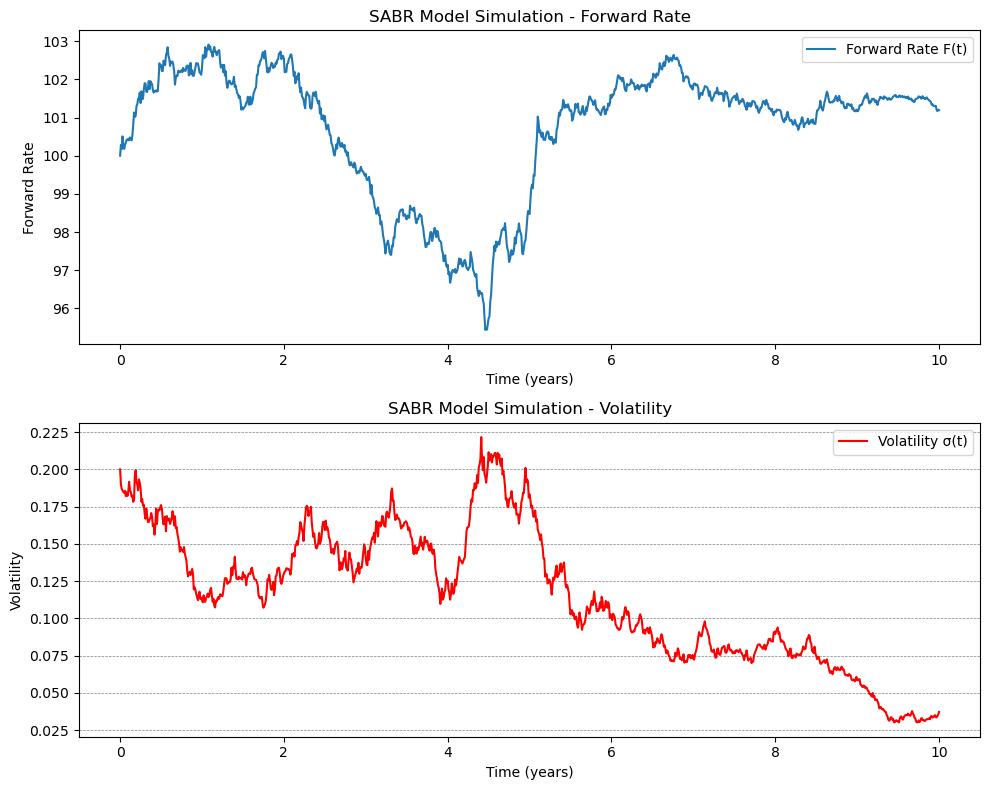

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def sabr_simul(F_0, sigma_0, beta, nu, rho, M, T):
    if not (-1 <= rho <= 1):
        raise ValueError("Correlation rho must be between -1 and 1.")
    if M <= 0 or T <= 0:
        raise ValueError("Number of time steps M and total time T must be positive.")

    delta = T / M
    delta_sqrt = np.sqrt(delta)
    rho_sqrt = np.sqrt(1 - rho**2)
    sigma = np.zeros(M + 1)
    F = np.zeros(M + 1)
    sigma[0], F[0] = sigma_0, F_0
    Z = np.random.standard_normal((2, M))

    for m in range(1, M + 1):
        F[m] = F[m-1] + sigma[m-1] * F[m-1]**beta * delta_sqrt * Z[0, m-1]
        sigma[m] = sigma[m-1] + nu * sigma[m-1] * delta_sqrt * (rho * Z[0, m-1] + rho_sqrt * Z[1, m-1])
        if F[m] < 0:
            F[m] = F[m-1]
        if sigma[m] < 0:
            sigma[m] = sigma[m-1]

    return F, sigma

def plot_sabr(F, sigma, T):
    time_steps = np.linspace(0, T, len(F))
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    ax[0].plot(time_steps, F, label='Forward Rate F(t)')
    ax[0].set_title('SABR Model Simulation - Forward Rate')
    ax[0].set_xlabel('Time (years)')
    ax[0].set_ylabel('Forward Rate')
    ax[0].legend()

    ax[1].plot(time_steps, sigma, label='Volatility σ(t)', color='red')
    ax[1].set_title('SABR Model Simulation - Volatility')
    ax[1].set_xlabel('Time (years)')
    ax[1].set_ylabel('Volatility')
    ax[1].legend()

    plt.tight_layout()
    plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
    plt.show()

# Example usage:
F_0, sigma_0, beta, upsilon, rho, M, T = 100, 0.2, 0.5, 0.3, -0.2, 1000, 10.0
F, sigma = sabr_simul(F_0, sigma_0, beta, upsilon, rho, M, T)
plot_sabr(F, sigma, T)  # Note: Plotting will not execute here but can be run in a local environment.



In [16]:
def correlation_sabr(F_0, sigma_0, beta, upsilon, rho, M, T):
    F, sigma = sabr_simul(F_0, sigma_0, beta, upsilon, rho, M, T)
    correlation_matrix = np.corrcoef(F, sigma)
    return correlation_matrix[0, 1]

# Example usage: This line is commented out to prevent execution here.
correlation = correlation_sabr(100, 0.2, 0.5, 0.3, -0.2, 1000, 1.0)
print("Correlation between F and sigma:", correlation)


Correlation between F and sigma: -0.38823661206659665


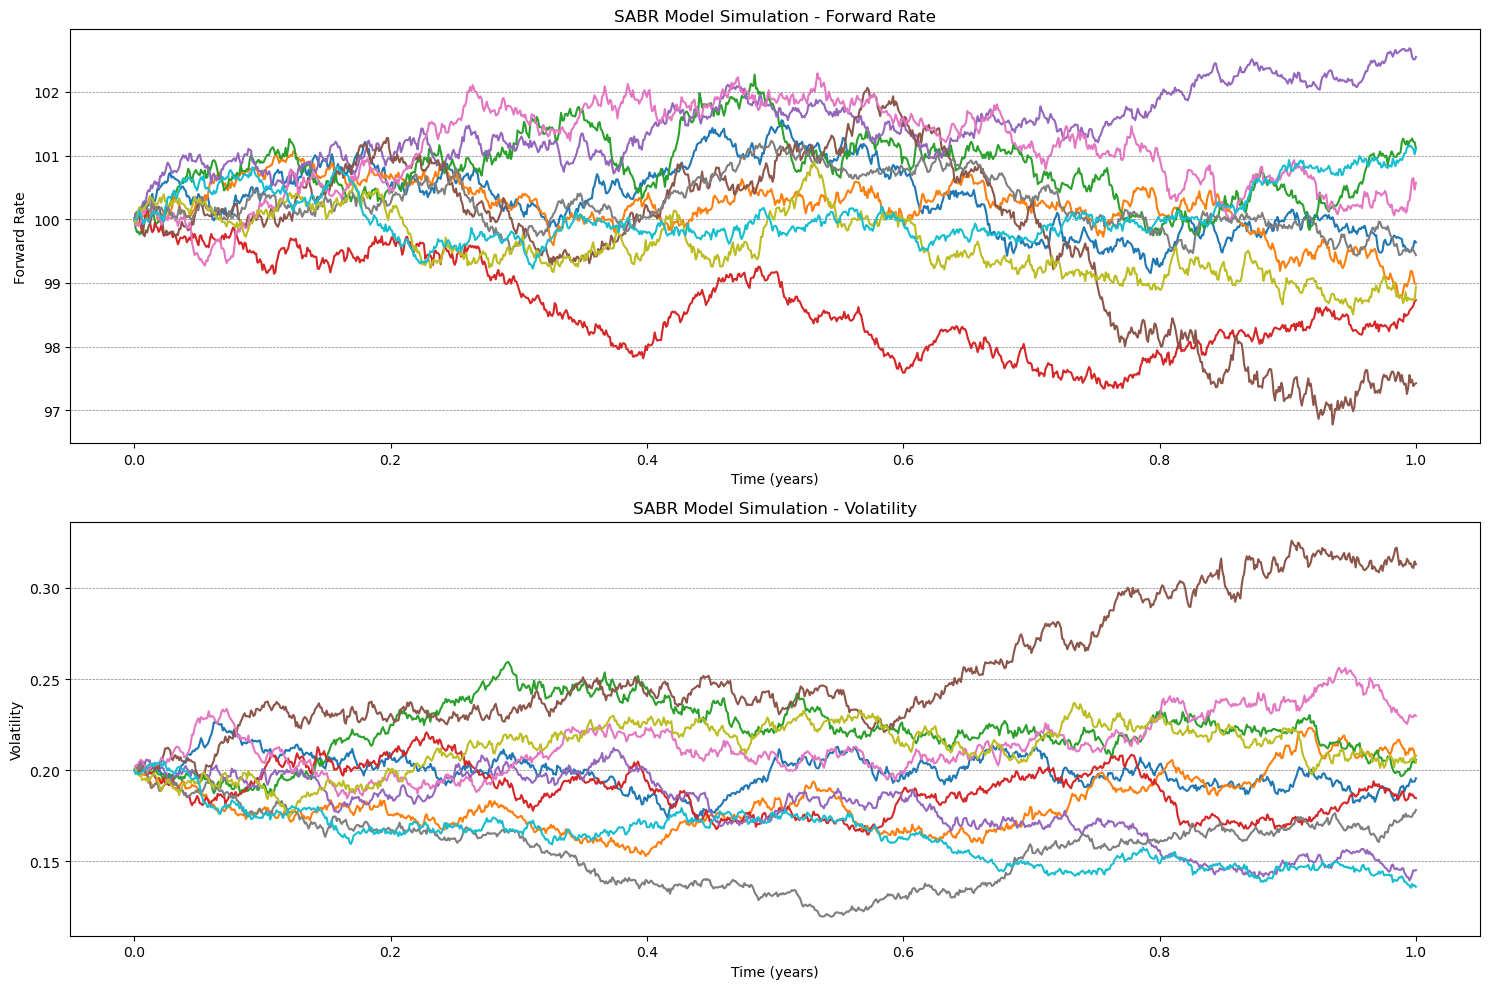

In [40]:
def run_multiple_sabr_simulations(F_0, sigma_0, beta, nu, rho, M, T, num_simulations):
    """
    Runs multiple SABR model simulations and plots each simulation result.

    Parameters:
        F_0 (float): Initial forward rate or asset price.
        sigma_0 (float): Initial volatility.
        beta (float): Elasticity parameter of the SABR model.
        upsilon (float): Volatility of volatility (vol-vol).
        rho (float): Correlation between the asset price and its volatility.
        M (int): Number of time steps.
        T (float): Total time.
        num_simulations (int): Number of simulations to run.
    """
    plt.figure(figsize=(15, 10))
    
    for i in range(num_simulations):
        F, sigma = sabr_simul(F_0, sigma_0, beta, nu, rho, M, T)
        time_steps = np.linspace(0, T, M + 1)
        plt.subplot(2, 1, 1)
        plt.plot(time_steps, F)
        plt.title('SABR Model Simulation - Forward Rate')
        plt.xlabel('Time (years)')
        plt.ylabel('Forward Rate')
        plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

        plt.subplot(2, 1, 2)
        plt.plot(time_steps, sigma)
        plt.title('SABR Model Simulation - Volatility')
        plt.xlabel('Time (years)')
        plt.ylabel('Volatility')
        plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
    
    plt.tight_layout()
    plt.show()

# Example usage:
run_multiple_sabr_simulations(100, 0.2, 0.5, 0.25, -0.4, 1000, 1.0, 10)  # This line is commented to prevent execution here.

